In [1]:
from keras.models import load_model
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
import keras.backend as K
sys.path.append('/home/marsdenlab/libraries/keras-fcn')
sys.path.append('/home/marsdenlab/libraries/keras-fcn/voc2011/')
import yaml
with open("init_args.yml", 'r') as stream:
    try:
        init_args = yaml.load(stream)
    except yaml.YAMLError as exc:
        print(exc)

Using TensorFlow backend.


In [2]:
fcn = load_model('./output/fcn_vgg16.h5')

In [3]:
fcn.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 500, 500, 3)   0                                            
____________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D) (None, 700, 700, 3)   0                                            
____________________________________________________________________________________________________
conv1_1 (Conv2D)                 (None, 698, 698, 64)  1792                                         
____________________________________________________________________________________________________
conv1_2 (Conv2D)                 (None, 698, 698, 64)  36928                                        
___________________________________________________________________________________________

In [4]:
#Get VOC data
from voc_generator import PascalVocGenerator, ImageSetLoader
datagen = PascalVocGenerator(**init_args['pascal_voc_generator']['train'])
val_loader = ImageSetLoader(**init_args['image_set_loader']['val'])

flow_args = init_args['pascal_voc_generator']['flow_from_imageset']
val_flow_args = flow_args.copy()
val_flow_args['image_set_loader'] = val_loader

iterator = datagen.flow_from_imageset(**val_flow_args)

In [5]:
X = []
Y = []
yhat=[]
for i in range(200):
    x,y = iterator.next()
    X.append(x)
    Y.append(y)
    yhat.append(fcn.predict(x, batch_size=1))

X = np.array(X)[:,0,:,:,:]
Y = np.array(Y)[:,0,:,:,:]

In [9]:
loss = fcn.evaluate(X,Y, batch_size=1)
yhat = fcn.predict(X,batch_size=1,verbose=1)

200/200 [==============================] - 20s    


In [7]:
#yhat = fcn.predict(Xnorm.astype(K.floatx()), batch_size=1)
#yhat_zero = fcn.predict(np.zeros(Xnorm.shape),batch_size=1)
print X[0].shape
print Y[0].shape
print yhat[0].shape

(500, 500, 3)
(500, 500, 21)
(1, 500, 500, 21)


[1.1920931797249068e-07, 0.75284639365971084, 0.75284639365971084]
14.8794
[[[[ nan  nan  nan ...,  nan  nan  nan]
   [ nan  nan  nan ...,  nan  nan  nan]
   [ nan  nan  nan ...,  nan  nan  nan]
   ..., 
   [ nan  nan  nan ...,  nan  nan  nan]
   [ nan  nan  nan ...,  nan  nan  nan]
   [ nan  nan  nan ...,  nan  nan  nan]]

  [[ nan  nan  nan ...,  nan  nan  nan]
   [ nan  nan  nan ...,  nan  nan  nan]
   [ nan  nan  nan ...,  nan  nan  nan]
   ..., 
   [ nan  nan  nan ...,  nan  nan  nan]
   [ nan  nan  nan ...,  nan  nan  nan]
   [ nan  nan  nan ...,  nan  nan  nan]]

  [[ nan  nan  nan ...,  nan  nan  nan]
   [ nan  nan  nan ...,  nan  nan  nan]
   [ nan  nan  nan ...,  nan  nan  nan]
   ..., 
   [ nan  nan  nan ...,  nan  nan  nan]
   [ nan  nan  nan ...,  nan  nan  nan]
   [ nan  nan  nan ...,  nan  nan  nan]]

  ..., 
  [[ nan  nan  nan ...,  nan  nan  nan]
   [ nan  nan  nan ...,  nan  nan  nan]
   [ nan  nan  nan ...,  nan  nan  nan]
   ..., 
   [ nan  nan  nan ...,  nan  nan  

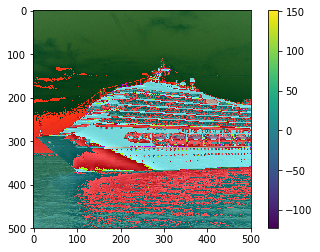

In [8]:
%matplotlib inline
print loss
print np.mean(X[0])
print yhat[0]
plt.figure()
plt.imshow(X[0])
plt.colorbar()
plt.show()

In [9]:
layer_dict = dict([(layer.name, layer) for layer in fcn.layers])
print layer_dict['input_1']
print layer_dict['score']